## Task1: Import DataSet
### Import Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

### Import Data

In [31]:
filepath= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)
headers=['Age', 'Gender', 'BMI', 'No_Of_Children', 'Smoker', 'Region', 'Charges']
df.columns=headers

#Replace ?
df.replace('?', np.NaN, inplace=True)
# Remember, df.info() give more accurate data about existence of missing values in any shape like '', Nan, NAN, ?, 
print(df.isna().sum())
df.tail()

Age               4
Gender            0
BMI               0
No_Of_Children    0
Smoker            7
Region            0
Charges           0
dtype: int64


,Age,Gender,BMI,No_Of_Children,Smoker,Region,Charges
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229
2771,54,2,31.600,0,0,3,9850.43200


## Task2: Data Wrangling
* Note: USing 'Inplace = True' gives me a warning, I should use df.loc but using old method df[x]=df[x].p() is easier for me
* In this code instead of replace(np.nan, ...), fillna() is used 
* for finding the most frequent value for 'Smoker' instead of using df[[]].info(), idmax is used

In [32]:
# Report Non-Null Value Count + Dtype
#df.info()

#Age  --> Continuous Variable --> Replace with Mean
df[['Age']] = df[['Age']].astype(float)
df[['Age']] = df[['Age']].fillna(df[['Age']].mean(axis=0))


#Smoker -> categorical variable  -> Replace with most frequent value
#find the most frequent value
is_smoker = df['Smoker'].value_counts().idxmax()
df[['Smoker']] = df[['Smoker']].fillna(is_smoker)

# Update datatypes
df[["Age", "Smoker"]] = df[["Age", "Smoker"]].astype(int)
#Double Check dataset
print(df.info())

# reduce decimal places to 2 in 'Charges'
df[['Charges']]= df[['Charges']].round(2)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2772 non-null   int64  
 1   Gender          2772 non-null   int64  
 2   BMI             2772 non-null   float64
 3   No_Of_Children  2772 non-null   int64  
 4   Smoker          2772 non-null   int64  
 5   Region          2772 non-null   int64  
 6   Charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


,Age,Gender,BMI,No_Of_Children,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86
5,31,1,25.740,0,0,4,3756.62
6,46,1,33.440,1,0,4,8240.59
7,37,1,27.740,3,0,1,7281.51
8,37,2,29.830,2,0,2,6406.41
9,60,1,25.840,0,0,1,28923.14


## Task 3 : Exploratory Data Analysis (EDA)

* implementation of regplot for 'Charges' with respect to 'BMI

(0.0, 66902.85800000001)

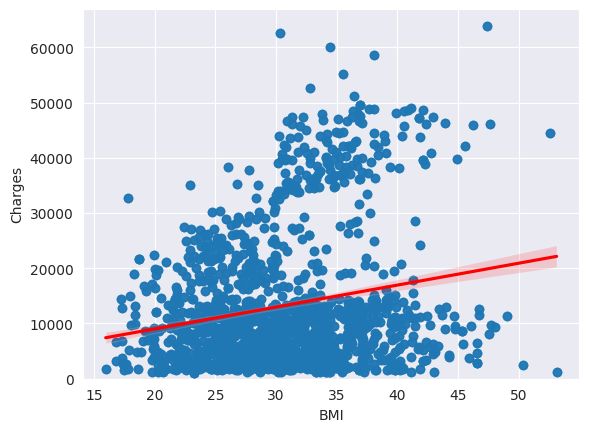

In [33]:
sns.regplot(x='BMI', y='Charges', data=df, line_kws={'color': 'red'})
plt.ylim(0,)

### Interpretation of the Regression Plot

The plot provided shows a scatter plot with a regression line overlay, commonly known as a regplot. Here's a step-by-step interpretation:

#### 1. **Axes and Variables**
   - **X-axis (BMI):** This axis represents Body Mass Index (BMI), a measure of body fat based on height and weight.
   - **Y-axis (Charges):** This axis represents the charges, which might refer to medical costs or insurance charges.

#### 2. **Scatter Plot**
   - The blue dots represent individual data points, with each point corresponding to a combination of BMI and charges for a particular individual.
   - The density of the points suggests a higher concentration of individuals with a BMI in the range of 25 to 35 and charges below 20,000.

#### 3. **Regression Line**
   - The red line represents the linear regression line fitted to the data.
   - The slope of the line indicates the direction and strength of the relationship between BMI and charges.

#### 4. **Trend and Relationship**
   - **Positive Relationship:** The slope of the regression line is positive, indicating that as BMI increases, charges tend to increase as well.
   - **Strength of the Relationship:** The scatter of the data points around the regression line suggests that there is some variability in charges that is not explained by BMI alone. The points are widely scattered, indicating a weak correlation.

#### 5. **Statistical Significance**
   - The shaded area around the regression line represents the confidence interval. If this area is narrow, it indicates a higher confidence in the estimate of the regression line. In this plot, the confidence interval widens as BMI increases, suggesting less certainty in the relationship for higher BMI values.

#### 6. **Outliers**
   - There are some data points that are far from the regression line, particularly at higher BMI values and higher charges, which could be considered outliers. These points might have a significant impact on the regression line and should be investigated further.

#### 7. **Practical Implications**
   - Although there is a positive correlation between BMI and charges, the wide scatter indicates that BMI is not the sole predictor of charges. Other factors might also play a significant role in determining charges.

#### 8. **Limitations**
   - The linear model may not be the best fit for the data if the relationship is not truly linear. Other models or transformations might be needed to better capture the relationship.
   - The presence of outliers and the variability suggests that additional predictors or a more complex model might be necessary to improve the prediction accuracy.

### Summary
The regression plot shows a positive correlation between BMI and charges, indicating that higher BMI tends to be associated with higher charges. However, the relationship is weak, as indicated by the wide scatter of data points around the regression line. The plot also highlights potential outliers and suggests that other factors may influence charges, necessitating further investigation and potentially more complex modeling approaches.

* Implementation of BoxPlot for 'Charges' with respect to 'Smoker'

0.0
564


count    2772.000000
mean        0.203463
std         0.402647
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Smoker, dtype: float64

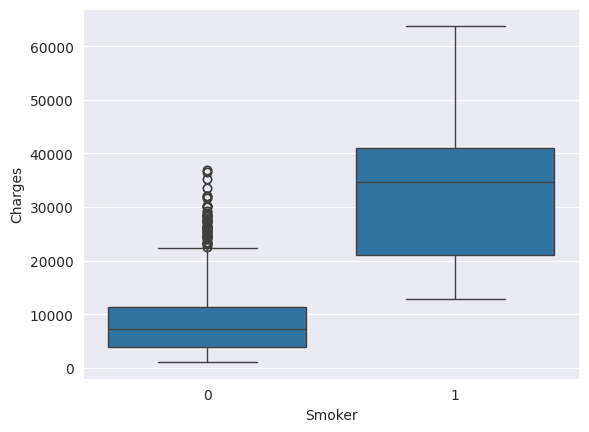

In [108]:
sns.boxplot(x= 'Smoker', y= 'Charges', data = df)

df_smoker_0 = df[df['Smoker'] == 0]




### Interpretation of the Boxplot

The provided boxplot visualizes the distribution of charges based on the smoking status of individuals. Here is a complete interpretation:

#### 1. **Axes and Variables**
   - **X-axis (Smoker):** This axis represents the smoking status of individuals. `0` indicates non-smokers and `1` indicates smokers.
   - **Y-axis (Charges):** This axis represents the charges, likely referring to medical costs or insurance charges.

#### 2. **Understanding Boxplot Elements**
   - **Box:** Represents the interquartile range (IQR), which is the range between the first quartile (25th percentile) and the third quartile (75th percentile).
   - **Median Line:** The line inside the box represents the median (50th percentile) of the data.
   - **Whiskers:** Lines extending from the box to the smallest and largest values within 1.5 times the IQR.
   - **Outliers:** Points outside the whiskers, representing data points that are significantly different from the rest.

#### 3. **Non-Smokers (0)**
   - **Median Charges:** The median charge for non-smokers is relatively low, indicating that most non-smokers incur lower medical costs.
   - **IQR:** The middle 50% of charges for non-smokers are within a lower range compared to smokers.
   - **Whiskers and Outliers:** The upper whisker extends to a lower value compared to smokers, and there are several outliers indicating that some non-smokers do have higher charges, but these are relatively few.

#### 4. **Smokers (1)**
   - **Median Charges:** The median charge for smokers is significantly higher, indicating that smokers generally incur higher medical costs.
   - **IQR:** The IQR for smokers is much larger, showing a wider range of charges in the middle 50% of the data.
   - **Whiskers and Outliers:** The upper whisker extends to a much higher value, and there are no significant outliers, suggesting that higher charges are more common and expected for smokers.

#### 5. **Comparison Between Smokers and Non-Smokers**
   - **Higher Charges for Smokers:** The boxplot clearly shows that smokers tend to have higher medical charges compared to non-smokers. This is evident from the higher median, wider IQR, and higher whiskers.
   - **Greater Variation in Charges for Smokers:** The spread of charges (IQR) for smokers is wider, indicating greater variability in the medical costs among smokers.
   - **Outliers:** Non-smokers have several outliers with higher charges, but these are relatively few compared to the typical charges for smokers, which are generally higher even without significant outliers.

### Summary
The boxplot illustrates a clear difference in medical charges between smokers and non-smokers. Smokers incur significantly higher charges on average, as indicated by the higher median and wider IQR. This suggests that smoking status is a strong predictor of higher medical costs. The presence of outliers among non-smokers indicates that while most non-smokers have lower charges, there are exceptions. Overall, the plot highlights the financial impact of smoking on medical expenses.

* Calculate Correlation matrix for dataset

In [35]:
print(df.corr())

# 'Smoker' and 'Charges' --> Strong Positive Correlation
# 'Age' and 'Charges'    --> Moderate Positive Correlation
# 'BMI' and 'Charges'    --> Weak Positive Correlation

                     Age    Gender       BMI  No_Of_Children    Smoker  \
Age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
Gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
BMI             0.113048  0.042924  1.000000       -0.001492  0.011489   
No_Of_Children  0.037574  0.016020 -0.001492        1.000000  0.006362   
Smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
Region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
Charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  Region   Charges  
Age            -0.007167  0.298624  
Gender          0.022213  0.062837  
BMI             0.271119  0.199846  
No_Of_Children -0.025717  0.066442  
Smoker          0.054077  0.788783  
Region          1.000000  0.054058  
Charges         0.054058  1.000000  


### Interpretation of the Correlation Matrix

The provided image is a correlation matrix output, showing the pairwise correlation coefficients between different variables in the dataset. Here's a detailed interpretation of the matrix:

#### 1. **Understanding Correlation Coefficients**
   - **Range:** Correlation coefficients range from -1 to 1.
     - **+1:** Perfect positive correlation.
     - **0:** No correlation.
     - **-1:** Perfect negative correlation.
   - **Significance:**
     - **Positive Value:** Indicates a positive relationship between two variables.
     - **Negative Value:** Indicates a negative relationship between two variables.
     - **Magnitude:** The closer the value is to 1 or -1, the stronger the relationship.

#### 2. **Variables in the Matrix**
   - **Age**
   - **Gender**
   - **BMI (Body Mass Index)**
   - **No_Of_Children**
   - **Smoker**
   - **Region**
   - **Charges**

#### 3. **Key Observations**
   - **Age vs. Charges (0.298694):** There is a positive correlation between age and charges. As age increases, charges tend to increase, though the correlation is moderate.
   - **BMI vs. Charges (0.199846):** There is a weak positive correlation between BMI and charges. As BMI increases, charges tend to increase slightly.
   - **Smoker vs. Charges (0.789545):** There is a strong positive correlation between being a smoker and charges. Smokers tend to have significantly higher charges.
   - **Region vs. Charges (0.054058):** There is a very weak positive correlation between region and charges, indicating almost no relationship.
   - **No_Of_Children vs. Charges (0.066442):** There is a very weak positive correlation between the number of children and charges.

#### 4. **Other Relationships**
   - **Age vs. BMI (0.113068):** There is a weak positive correlation between age and BMI.
   - **Age vs. No_Of_Children (0.037631):** There is a very weak positive correlation between age and the number of children.
   - **Gender vs. BMI (0.042924):** There is a very weak positive correlation between gender and BMI.
   - **Smoker vs. BMI (0.010524):** There is a negligible positive correlation between being a smoker and BMI.
   - **Age vs. Gender (-0.020659):** There is a negligible negative correlation between age and gender.
   - **Smoker vs. Age (-0.023661):** There is a negligible negative correlation between being a smoker and age.
   - **No_Of_Children vs. BMI (-0.001492):** There is no correlation between the number of children and BMI.

#### 5. **Insights for Multi-Linear Regression**
   - **Strong Predictors:** The strong correlation between smoking status and charges suggests that smoking is a significant predictor of medical charges.
   - **Weak Predictors:** Age and BMI have some predictive power but are weaker predictors compared to smoking status.
   - **Interaction Effects:** Considering the interactions between significant variables like BMI and smoking status could enhance the predictive power of the model.

### Summary
The correlation matrix highlights the relationships between various factors in the dataset. Smoking status has the strongest positive correlation with charges, indicating that it is a crucial factor in predicting medical costs. Age and BMI also show positive correlations with charges but are less strong. Other variables like the number of children and region have very weak correlations with charges, suggesting they might have minimal impact on medical costs in this dataset. This information can guide the development of a more accurate predictive model using multiple linear regression, potentially including interaction terms for better performance.

#### Consider 'Age' feature
* bin the Age feature

In [63]:
bin_edge = [18,30,40,50,60,70]
cat_name = ["18-30", "30-40","40-50","50-60", "60-70"]
df['Binned_Age']=pd.cut(df['Age'], bins=bin_edge, labels=cat_name, include_lowest=True)
df['Binned_Age'].head(40)
print(df['Binned_Age'].value_counts())
'''
plt.bar(cat_name, df['Binned_Age'].value_counts())
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Age vs Count')
plt.tight_layout()
plt.show()
'''


Binned_Age
18-30    932
40-50    576
50-60    552
30-40    526
60-70    186
Name: count, dtype: int64


"\nplt.bar(cat_name, df['Binned_Age'].value_counts())\nplt.xlabel('Categories')\nplt.ylabel('Count')\nplt.title('Age vs Count')\nplt.tight_layout()\nplt.show()\n"

## Task 4 : Model Development

In [64]:
lm_smoker = LinearRegression()
lm_smoker.fit(df[['Smoker']], df[['Charges']])
R2_lm = lm_smoker.score(df[['Smoker']], df['Charges'])
print(lm_smoker.coef_)

print(f'R2 lm_Smoker: {R2_lm}')

Z = df[['Age', 'Gender', 'BMI', 'No_Of_Children', 'Smoker', 'Region']]
Y = df[['Charges']]
lm_all = LinearRegression()
lm_all.fit(Z,Y)
R2_lm_all =lm_all.score(Z, Y)
print(lm_all.coef_)
print(f'R2 lm_all: {R2_lm_all}')



pipeline = Pipeline(steps=[('scaler', StandardScaler()),('polynomial', PolynomialFeatures(degree=2)), ('Model', LinearRegression())])
pipeline.fit(Z,Y)
R2_pipe = pipeline.score(Z, Y)

print(f'R2 Pipeline: {R2_pipe}')



[[23805.26542958]]
R2 lm_Smoker: 0.6221791733924185
[[  255.67496013   -52.2547249    328.35529713   497.651344
  24001.46095435  -326.7228072 ]]
R2 lm_all: 0.7504083820289634
R2 Pipeline: 0.8452576215477541


## Model Refinement

R_Ridge: 0.7469894680059708 
R2List= [0.838961776294393, 0.8420441452456083, 0.8431693269595661, 0.841896244027535, 0.8398873695011404]
Final_R2= 0.8431693269595661


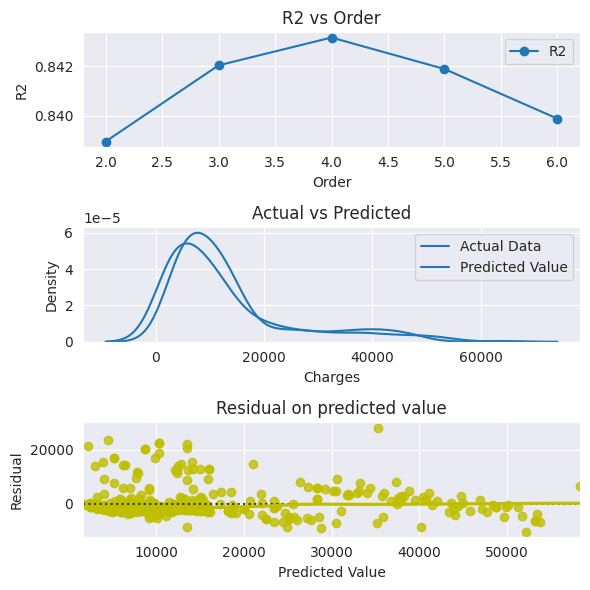

In [89]:
X_data = df.drop(['Charges', 'Binned_Age'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X_data , Y, test_size = 0.2, random_state = 0)
RR = Ridge(alpha= 0.1)
RR.fit(x_train, y_train)
R2_ridge = RR.score(x_test, y_test)
print(f'R_Ridge: {R2_ridge} ')
scaler = StandardScaler()
order = [2,3,4,5,6]
R2_list=[]
for n in order:        
    RR_pr = Ridge(alpha=0.21)
    pr = PolynomialFeatures(degree=n)
    Xtrain_pr = pr.fit_transform(x_train)
    Xtrain_pr = scaler.fit_transform(Xtrain_pr)
    Xtest_pr = pr.fit_transform(x_test)
    Xtest_pr = scaler.fit_transform(Xtest_pr)
    RR_pr.fit(Xtrain_pr,y_train)
    Yhat_RR_pr = RR_pr.predict(Xtest_pr)
    R2_ridge_pr = r2_score(y_test, Yhat_RR_pr)
    R2_list.append(R2_ridge_pr)
    
print(f'R2List= {R2_list}')

# Comment GridSearch Part to speedup process
'''
#GridSearch
RR_Grid = Ridge()
parameter = np.logspace(-3, 3, 1000)
grid = GridSearchCV(RR_Grid, param_grid={'alpha': parameter}, cv=4)
grid.fit(x_train, y_train)
best_alpha = grid.best_estimator_
print(f'Best Alpha=  {best_alpha}')

output: Best Alpha= 0.21
'''
Final_RR = Ridge(alpha=0.21)
bestpoly= PolynomialFeatures(degree=4)
Xtrain_poly = bestpoly.fit_transform(x_train)
Xtrain_poly= scaler.fit_transform(Xtrain_poly)
Xtest_poly = bestpoly.fit_transform(x_test)
Xtest_poly = scaler.fit_transform(Xtest_poly)
Final_RR.fit(Xtrain_poly,y_train)
Yhat_poly=Final_RR.predict(Xtest_poly)
Final_R2= Final_RR.score(Xtest_poly,y_test)
print(f'Final_R2= {Final_R2}')
#--------------------------------------------------------------------------
#Plot
fig, (poly_degree,kde_RR, res_ax) = plt.subplots(nrows=3, ncols=1, figsize=(6,6))

#R2 against Order Plot
poly_degree.plot(order, R2_list, label = 'R2', marker = 'o')
poly_degree.set_xlabel('Order')
poly_degree.set_ylabel('R2')
poly_degree.set_title('R2 vs Order')
poly_degree.legend()

#KDE Plot
sns.kdeplot(y_test, color = 'r', label='Actual Data', ax=kde_RR)
sns.kdeplot(Yhat_poly, color='b', label = 'Predicted Value', ax=kde_RR)
kde_RR.set_xlabel('Charges')
kde_RR.set_ylabel('Density')
kde_RR.set_title('Actual vs Predicted')
kde_RR.legend() 

#Residual Plot
ridge_residual = y_test - Yhat_poly
sns.residplot(x=Yhat_poly, y= ridge_residual, color = 'y', lowess=True, ax=res_ax)
res_ax.set_xlabel('Predicted Value')
res_ax.set_ylabel('Residual')
res_ax.set_title('Residual on predicted value')


plt.tight_layout()
plt.show()